In [13]:
import pandas as pd

In [16]:
data = pd.read_csv('articles.csv')

In [17]:
data.head()

,Unnamed: 0,PreviewURL,ReportURL,Date,Source,Title,Label,Explanation,Country
0,0,https://www.poynter.org/?ifcn_misinformation=c...,https://facta.news/notizia-falsa/2021/03/01/le...,2021-03-01,Facta,Covid-19 masks are dangerous and the obligatio...,FALSE,Covid-19 face masks are safe and there is no c...,Italy
1,1,https://www.poynter.org/?ifcn_misinformation=t...,https://www.newtral.es/bulo-protesta-rumania-m...,2021-03-01,Newtral.es,Thousands of people demonstrate in Romania aga...,FALSE,The photograph corresponds to protests held in...,"Spain, Romaina"
2,2,https://www.poynter.org/?ifcn_misinformation=t...,https://chequeado.com/verificacionfb/es-falso-...,2021-02-28,Chequeado,"The Argentine Vice President, Cristina Fernánd...",FALSE,One of the images corresponds to the flu vacci...,Argentina
3,3,https://www.poynter.org/?ifcn_misinformation=t...,https://chequeado.com/verificacionfb/es-falso-...,2021-02-26,Chequeado,The Province of Buenos Aires (Argentina) has a...,FALSE,The misinformation arose from a tweet by the d...,Argentina
4,4,https://www.poynter.org/?ifcn_misinformation=p...,https://facta.news/notizia-falsa/2021/02/26/qu...,2021-02-26,Facta,"Pfizer, Moderna and Astrazeneca are handing ou...",FALSE,The flyers are fake,Italy


In [18]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [19]:
from bertopic import BERTopic

In [30]:
model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens",nr_topics=10)

In [31]:
data_list = list(data.Title)

In [32]:
topics, probabilities = model.fit_transform(data_list)

In [33]:
data_list[0]

'Covid-19 masks are dangerous and the obligation to wear them is a crime against humanity'

In [34]:
timestamps = data.Date.to_list()

In [35]:
topics_over_time = model.topics_over_time(data_list, topics, timestamps)

In [36]:
topics_over_time

,Topic,Words,Frequency,Timestamp
0,10,"tamil, prayers, rules, lockdown, india",1,2020-01-05
1,-1,"mall, plaza, mandaluyong, shangri, clinics",1,2020-01-14
2,-1,"veracruz, stores, supermarkets, supplies, buy",1,2020-01-18
3,-1,"two, calm, all, happen, 18",1,2020-01-19
4,-1,"market, caused, chinese, new, video",1,2020-01-21
...,...,...,...,...
1889,10,"finished, vaccinating, argentina, already, all",1,2021-02-26
1890,223,"medication, herbal, treatment, indian, health",1,2021-02-26
1891,234,"mikovits, 2021, 19, cure, hydroxychloroquine",1,2021-02-26
1892,-1,"kirchner, cristina, fernández, argentine, vice",1,2021-02-28


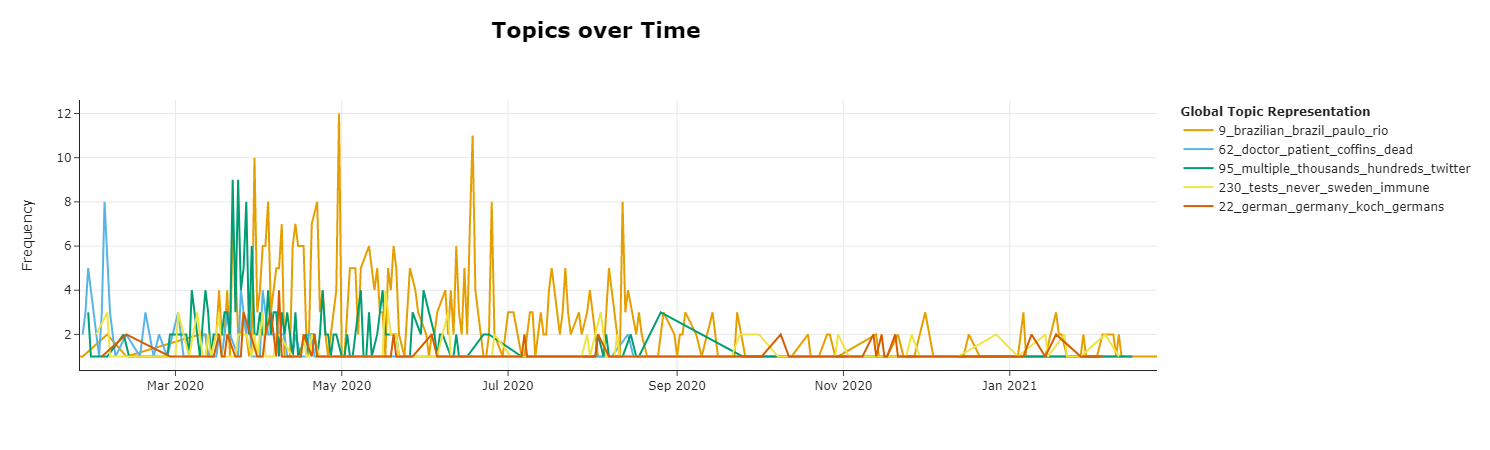

In [27]:
model.visualize_topics_over_time(topics_over_time, top_n=5)

In [28]:
# model.get_topics()

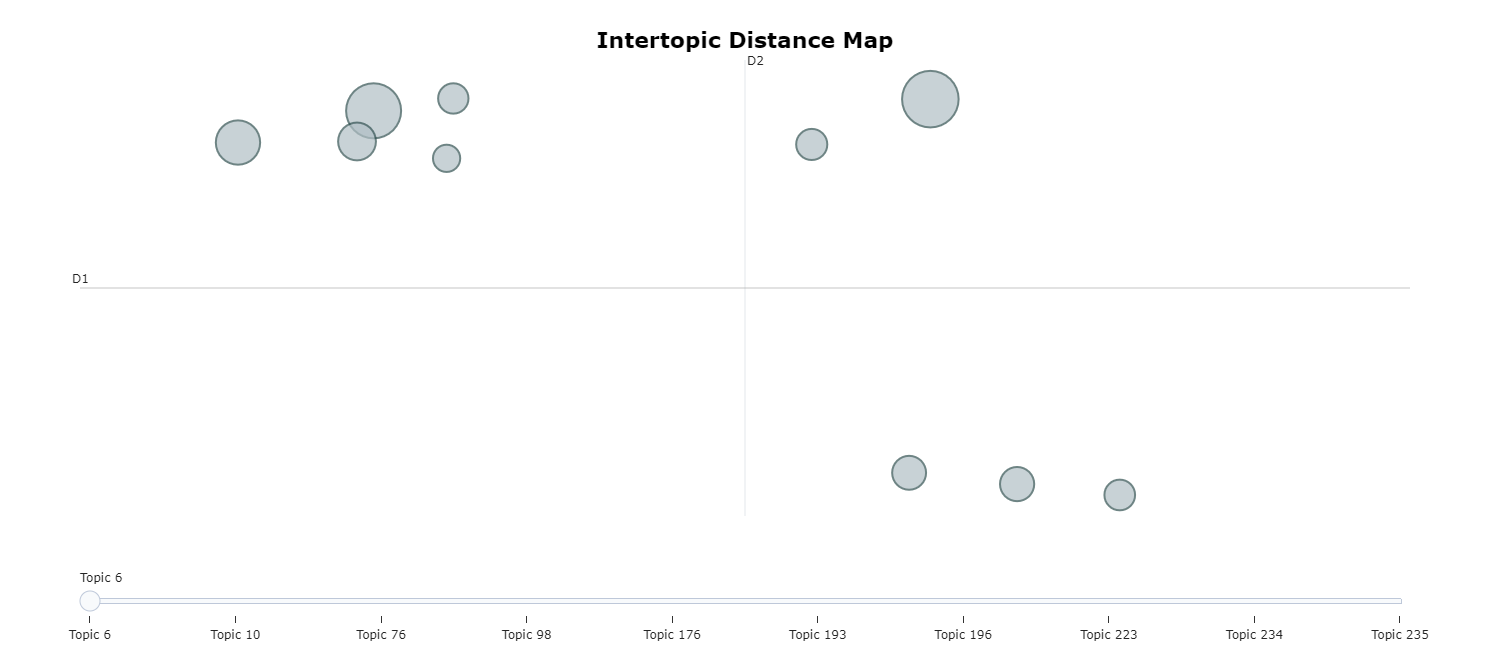

In [37]:
model.visualize_topics()

In [ ]:
#### Example 

In [38]:
topics[:10]

[-1, -1, -1, 10, -1, 223, 234, -1, -1, -1]

In [39]:
data_list[0]

'Covid-19 masks are dangerous and the obligation to wear them is a crime against humanity'

In [43]:
model.get_topics()

{-1: [('coronavirus', 0.027401760731205805),
  ('covid', 0.02568523597300097),
  ('19', 0.025019389631409938),
  ('with', 0.01720157171148157),
  ('video', 0.015538613752303202),
  ('not', 0.014813361555547532),
  ('who', 0.013918074302843142),
  ('vaccine', 0.013837471473057278),
  ('pandemic', 0.012849704402057866),
  ('shows', 0.012576159148419697)],
 6: [('5g', 0.2760212964564148),
  ('coronavirus', 0.04964015626785358),
  ('networks', 0.03229339032338212),
  ('pandemic', 0.03190650235459548),
  ('antennas', 0.027164569913547675),
  ('telecommunications', 0.02479061925997738),
  ('towers', 0.02124910222283775),
  ('network', 0.0193431063092907),
  ('five', 0.01884804884874391),
  ('circuit', 0.01878458708589459)],
 10: [('brazilian', 0.06666052451003349),
  ('brazil', 0.06288491218608384),
  ('paulo', 0.04075955734838888),
  ('19', 0.03866927899564583),
  ('video', 0.02330334658457953),
  ('deaths', 0.020239277358006742),
  ('rio', 0.018504152739131495),
  ('lockdown', 0.0180152020

In [18]:
model.get_topic_info()

,Topic,Count,Name
0,-1,6805,-1_covid_19_coronavirus_vaccine
1,190,621,190_coronavirus_cure_novel_garlic
2,12,596,12_brazilian_brazil_paulo_19
3,2,531,2_italy_italian_italians_video
4,185,502,185_cure_cures_lemon_hydroxychloroquine
5,163,393,163_19_vaccine_died_vaccines
6,83,323,83_facebook_shared_multiple_thousands
7,134,311,134_vaccines_vaccine_microchips_pandemic
8,104,210,104_lab_laboratory_nobel_coronavirus
9,126,200,126_coronavirus_infected_died_doctor
